 # A) Cálculo da expressão original

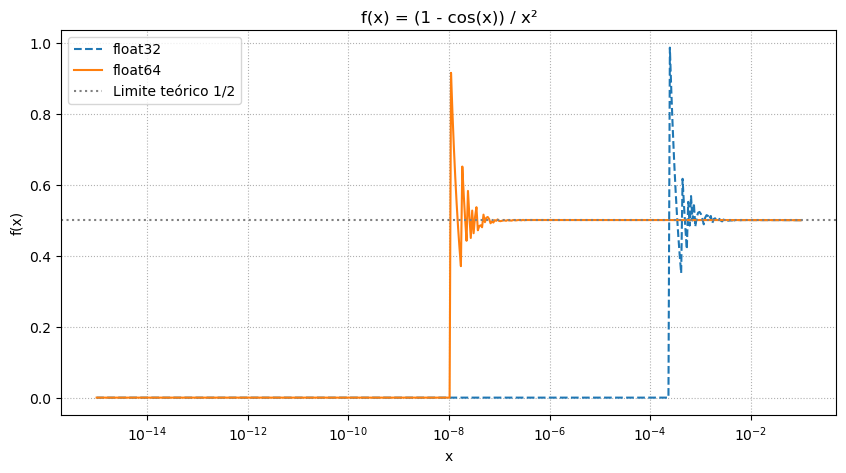

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Função original f(x) = (1 - cos(x)) / x^2
# Essa função é sensível a cancelamento numérico para x ≈ 0,
# pois 1 e cos(x) são muito próximos nesse caso.
# dtype permite escolher a precisão: float32 ou float64
def f_original(x, dtype=np.float64):
    x = np.array(x, dtype=dtype)  # Garante tipo de precisão
    return (1 - np.cos(x)) / x**2

# Gera uma sequência de valores de x em escala logarítmica
# Indo de 10⁻¹ até 10⁻¹⁵, para observar comportamento perto de 0
x_vals = np.logspace(-1, -15, 500)

# Avalia a função original com float32 e float64
f32_vals = f_original(x_vals, dtype=np.float32)
f64_vals = f_original(x_vals, dtype=np.float64)

#Plot do gráfico
plt.figure(figsize=(10, 5))
plt.plot(x_vals, f32_vals, label='float32', linestyle='--')
plt.plot(x_vals, f64_vals, label='float64')
plt.axhline(0.5, color='gray', linestyle=':', label='Limite teórico 1/2')
plt.xscale('log')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('f(x) = (1 - cos(x)) / x²')
plt.legend()
plt.grid(True, which="both", ls=":")
plt.show()


# B) Reescrevendo a função com identidade trigonométrica

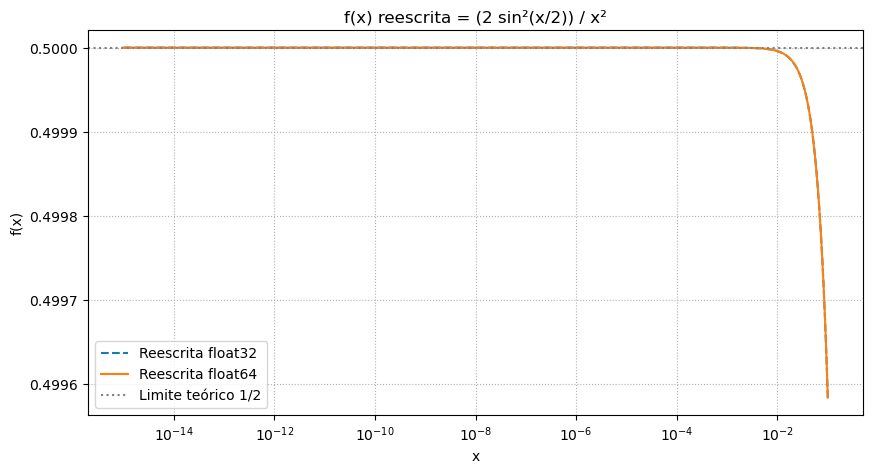

In [2]:
# Função reescrita usando identidade trigonométrica:
# 1 - cos(x) = 2 * sin²(x/2)
# Isso evita a subtração direta de valores quase iguais
def f_reescrita(x, dtype=np.float64):
    x = np.array(x, dtype=dtype)
    return (2 * np.sin(x / 2)**2) / x**2

# Avalia a função reescrita com float32 e float64
f32_vals_b = f_reescrita(x_vals, dtype=np.float32)
f64_vals_b = f_reescrita(x_vals, dtype=np.float64)

#Plot do gráfico
plt.figure(figsize=(10, 5))
plt.plot(x_vals, f32_vals_b, label='Reescrita float32', linestyle='--')
plt.plot(x_vals, f64_vals_b, label='Reescrita float64')
plt.axhline(0.5, color='gray', linestyle=':', label='Limite teórico 1/2')
plt.xscale('log')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('f(x) reescrita = (2 sin²(x/2)) / x²')
plt.legend()
plt.grid(True, which="both", ls=":")
plt.show()


# C) Comentário explicativo sobre cancelamento catastrófico

In [3]:
"""
Cancelamento catastrófico ocorre quando duas quantidades muito próximas são subtraídas, levando à perda significativa de dígitos significativos.
No exemplo de f(x) = (1 - cos(x)) / x², para x próximo de 0, o valor de cos(x) ≈ 1, então (1 - cos(x)) resulta numa subtração entre números quase iguais,
gerando erro de precisão. Isso é visível principalmente em float32.

A reescrita da função com a identidade trigonométrica evita essa subtração direta e melhora a estabilidade numérica.
Outro exemplo comum é a subtração de raízes próximas: sqrt(1 + ε) - 1 para ε muito pequeno.
"""


'\nCancelamento catastrófico ocorre quando duas quantidades muito próximas são subtraídas, levando à perda significativa de dígitos significativos.\nNo exemplo de f(x) = (1 - cos(x)) / x², para x próximo de 0, o valor de cos(x) ≈ 1, então (1 - cos(x)) resulta numa subtração entre números quase iguais,\ngerando erro de precisão. Isso é visível principalmente em float32.\n\nA reescrita da função com a identidade trigonométrica evita essa subtração direta e melhora a estabilidade numérica.\nOutro exemplo comum é a subtração de raízes próximas: sqrt(1 + ε) - 1 para ε muito pequeno.\n'

# D) Precisão simples vs dupla

In [4]:
# Avaliação dos erros relativos
# Define o valor teórico esperado do limite
true_val = 0.5

# Função para calcular erro relativo absoluto
def erro_relativo(val):
    return np.abs((val - true_val) / true_val)

# Imprime os maiores erros relativos para cada combinação
print("Erro relativo máximo (original):")
print("float32:", np.max(erro_relativo(f32_vals)))
print("float64:", np.max(erro_relativo(f64_vals)))

print("Erro relativo máximo (reescrita):")
print("float32:", np.max(erro_relativo(f32_vals_b)))
print("float64:", np.max(erro_relativo(f64_vals_b)))


Erro relativo máximo (original):
float32: 1.0
float64: 1.0
Erro relativo máximo (reescrita):
float32: 0.0008331537
float64: 0.0008330556051533433
